In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("Downloads/Customer churn analysis(Python).xlsx")

In [4]:
#to understand the structure:

df.head()
df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   102 non-null    object 
 2   Unnamed: 2   101 non-null    object 
 3   Unnamed: 3   101 non-null    object 
 4   Unnamed: 4   101 non-null    object 
 5   Unnamed: 5   101 non-null    object 
 6   Unnamed: 6   101 non-null    object 
 7   Unnamed: 7   101 non-null    object 
 8   Unnamed: 8   101 non-null    object 
 9   Unnamed: 9   101 non-null    object 
 10  Unnamed: 10  101 non-null    object 
 11  Unnamed: 11  101 non-null    object 
 12  Unnamed: 12  101 non-null    object 
dtypes: float64(1), object(12)
memory usage: 10.9+ KB


Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

In [10]:
df = pd.read_excel("Downloads/Customer churn analysis(Python).xlsx", header=6)


In [12]:
df.head()
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       0 non-null      float64
 1   CustomerID       100 non-null    object 
 2   Gender           100 non-null    object 
 3   Senior Status    100 non-null    object 
 4   SeniorCitizen    100 non-null    int64  
 5   Partner          100 non-null    object 
 6   Dependents       100 non-null    object 
 7   Tenure           100 non-null    int64  
 8   PhoneService     100 non-null    object 
 9   InternetService  100 non-null    object 
 10  MonthlyCharges   100 non-null    float64
 11  Churn            100 non-null    object 
 12  TotalCharges     100 non-null    float64
dtypes: float64(3), int64(2), object(8)
memory usage: 10.3+ KB


Index(['Unnamed: 0', 'CustomerID', 'Gender', 'Senior Status', 'SeniorCitizen',
       'Partner', 'Dependents', 'Tenure', 'PhoneService', 'InternetService',
       'MonthlyCharges', 'Churn', 'TotalCharges'],
      dtype='object')

In [17]:
#remove any leading/trailing spaces.

df.cplumns=df.columns.str.strip()

print(df.columns)

Index(['CustomerID', 'Gender', 'Senior Status', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'InternetService',
       'MonthlyCharges', 'Churn', 'TotalCharges'],
      dtype='object')


In [15]:

df.drop(columns=['Unnamed: 0'],inplace=True)

In [16]:
df.head

<bound method NDFrame.head of    CustomerID  Gender Senior Status  SeniorCitizen Partner Dependents  Tenure  \
0    CUST1000    Male    Non-Senior              0     Yes        Yes      23   
1    CUST1001  Female        Senior              1      No        Yes      71   
2    CUST1002    Male        Senior              1     Yes        Yes      35   
3    CUST1003    Male        Senior              1     Yes         No      37   
4    CUST1004    Male        Senior              1      No         No      24   
..        ...     ...           ...            ...     ...        ...     ...   
95   CUST1095  Female        Senior              1      No         No      65   
96   CUST1096  Female        Senior              1      No         No      31   
97   CUST1097  Female        Senior              1     Yes         No      62   
98   CUST1098  Female    Non-Senior              0     Yes         No      50   
99   CUST1099    Male    Non-Senior              0      No        Yes      24  

In [18]:
# Check missing values

df.isnull().sum()

CustomerID         0
Gender             0
Senior Status      0
SeniorCitizen      0
Partner            0
Dependents         0
Tenure             0
PhoneService       0
InternetService    0
MonthlyCharges     0
Churn              0
TotalCharges       0
dtype: int64

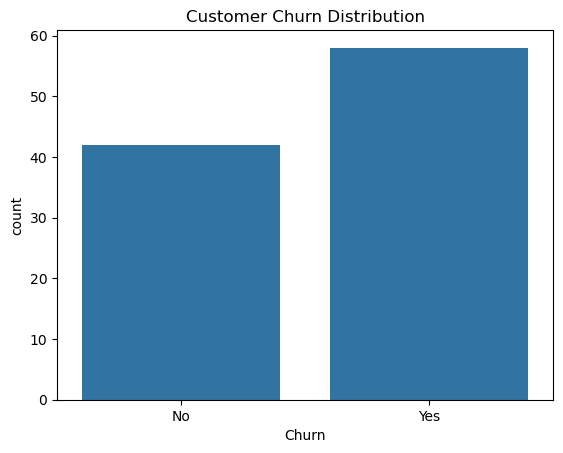

Churn
Yes    58.0
No     42.0
Name: proportion, dtype: float64


In [24]:
#Exploratory Data Analysis
#1 Overall Churn Rate


import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Churn')
plt.title('Customer Churn Distribution')
plt.show()

churn_rate=df['Churn'].value_counts(normalize=True)*100
print(churn_rate)

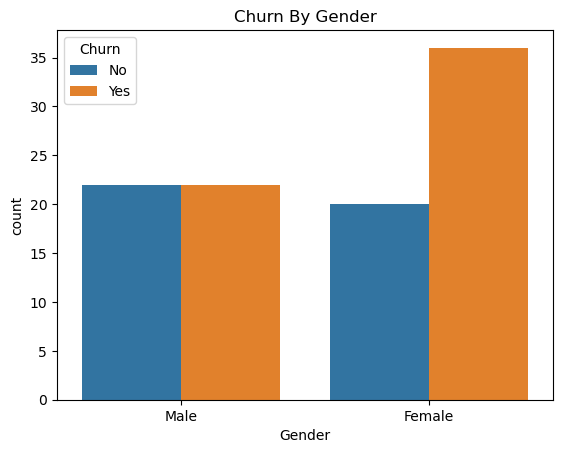

In [25]:
#2 Churn By Gender

sns.countplot(data=df, x='Gender', hue='Churn')
plt.title('Churn By Gender')
plt.show()

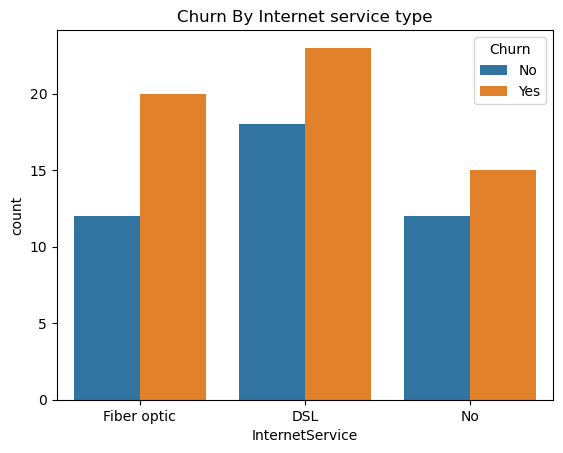

In [26]:
#3 Churn By InternateService

sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn By Internet service type')
plt.show()

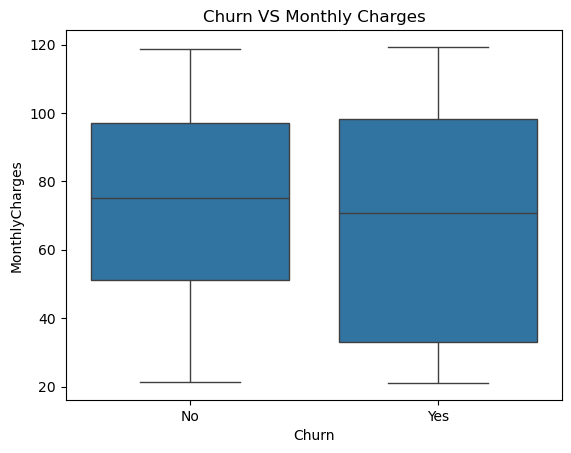

In [27]:
#4 Churn VS Monthly Charges

sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Churn VS Monthly Charges')
plt.show()

In [29]:
#STEP 4: Feature Correlation
#This will help us understand which numeric variables are related to churn, and how strong those relationships are.

#1 Convert Churn to Numeric

df['Churn-encoded']=df['Churn'].map({'Yes':1, "No":0})

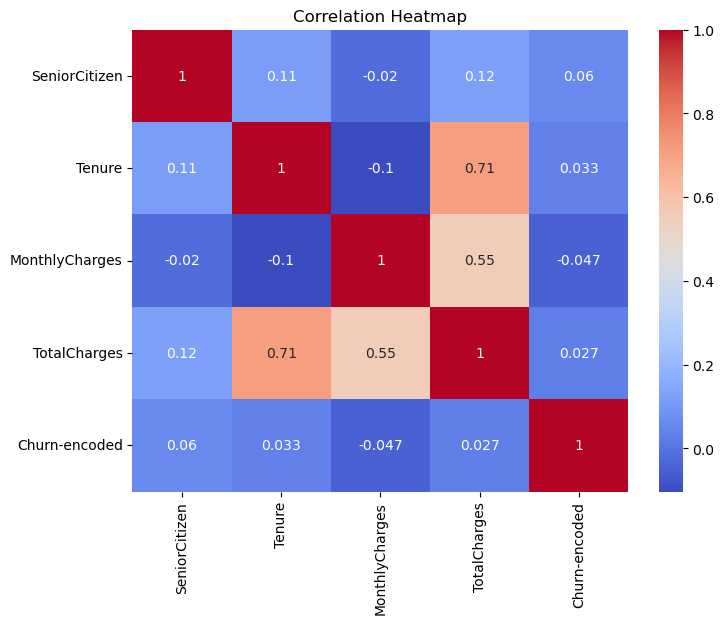

In [30]:
# Select only numeric columns
numeric_features = df.select_dtypes(include=['int64', 'float64'])

# Include the newly encoded 'Churn_Encoded'
correlation = numeric_features.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [31]:
 #STEP 5: Prepare Data for Machine Learning
#We'll now get the dataset ready for building a predictive model

# Drop columns that are identifiers or redundant
df_ml = df.drop(['CustomerID', 'Churn', 'Senior Status'], axis=1)


In [32]:
# One-hot encode categorical variables
df_ml = pd.get_dummies(df_ml, drop_first=True)


In [34]:
from sklearn.model_selection import train_test_split

X = df_ml.drop('Churn_Encoded', axis=1)
y = df_ml['Churn_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "['Churn_Encoded'] not found in axis"

In [35]:
print(df_ml.columns)


Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn-encoded', 'Gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')


In [36]:
# Define features (X) and target (y)
X = df_ml.drop('Churn-encoded', axis=1)
y = df_ml['Churn-encoded']

# Now split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
log_model = LogisticRegression(max_iter=2000)

# Train the model
log_model.fit(X_train, y_train)

# Predict on test set
y_pred = log_model.predict(X_test)

# Evaluate performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.40      0.44        10
           1       0.50      0.60      0.55        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.49        20
weighted avg       0.50      0.50      0.49        20


Confusion Matrix:
 [[4 6]
 [4 6]]
